# WeatherPy
----

### Analysis
* While there is no strong relationship between latitude and wind speed, the cities with wind speeds over 15 mph increase when you move either direction away from the equator.

* As you move closer to the equator max temperature increases.  The northern hemisphere tends to have the colder cities as you move away from the equator.

* There is no strong relationship between latitude and humidity.  However, there is a strong band of cities that sit at 100%.  Within that band, there is a cluster located at the equator.

---


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
print(len(cities))

#Print the country count to confirm it matches city count
print(len(countries))

611
611


In [3]:
#Create a dataframe to store the data
city_weather = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Country': countries, 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})

#Preview the dataframe
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,batagay,,RU,,,,,,
1,le havre,,FR,,,,,,
2,ushuaia,,AR,,,,,,
3,san patricio,,MX,,,,,,
4,hilo,,US,,,,,,


### Perform API Calls


In [4]:
#Variables to keep track of response number
record_num = 1
record_set = 1

#Base url to make the api call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#Run the API call for each city
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')
for index, row in city_weather.iterrows(): 
    #Create the query url for the API call
    query_url = base_url + row['City'] + ',' + row['Country'] + '&APPID=' + api_key
    
    #API call
    response = requests.get(query_url).json()
    
    #Exception script in case the city is not found by the API call
    try: 
        #Meassage to alert the user that the data is being retrieved
        print(f'Processing Weather Data for Record {record_num} of Set {record_set} | {response["name"]}')
        
        #Input data into the dataframe
        city_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather.loc[index, 'Date'] = response['dt']
        city_weather.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather.loc[index, 'Lat'] = response['coord']['lat']
        city_weather.loc[index, 'Lng'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather.loc[index, 'Windspeed'] = response['wind']['speed']
        
        #Increase the record count
        record_num += 1
        
    except (KeyError, IndexError):
        print("City not found....Skipping............")
    
    #If statement to handle the API call limits
    if record_num == 51:
        record_set += 1
        record_num = 1
        time.sleep(60)
        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')   


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Weather Data for Record 1 of Set 1 | Batagay
Processing Weather Data for Record 2 of Set 1 | Le Havre
Processing Weather Data for Record 3 of Set 1 | Ushuaia
Processing Weather Data for Record 4 of Set 1 | San Patricio
Processing Weather Data for Record 5 of Set 1 | Hilo
Processing Weather Data for Record 6 of Set 1 | Rikitea
Processing Weather Data for Record 7 of Set 1 | Manaure
Processing Weather Data for Record 8 of Set 1 | Avarua
Processing Weather Data for Record 9 of Set 1 | Ardakan
Processing Weather Data for Record 10 of Set 1 | Bredasdorp
Processing Weather Data for Record 11 of Set 1 | Kapaa
Processing Weather Data for Record 12 of Set 1 | Muisne
Processing Weather Data for Record 13 of Set 1 | Albany
Processing Weather Data for Record 14 of Set 1 | Bonthe
City not found....Skipping............
Processing Weather Data for Record 15 of Set 1 | Bluff
City not found....Skipping.....

Processing Weather Data for Record 25 of Set 3 | Hadejia
City not found....Skipping............
Processing Weather Data for Record 26 of Set 3 | Mamakan
Processing Weather Data for Record 27 of Set 3 | Bambous Virieux
Processing Weather Data for Record 28 of Set 3 | Huilong
Processing Weather Data for Record 29 of Set 3 | Ilulissat
Processing Weather Data for Record 30 of Set 3 | Mangrol
Processing Weather Data for Record 31 of Set 3 | Nkoteng
Processing Weather Data for Record 32 of Set 3 | Lamu
Processing Weather Data for Record 33 of Set 3 | Kavieng
Processing Weather Data for Record 34 of Set 3 | Brae
Processing Weather Data for Record 35 of Set 3 | Alice Springs
Processing Weather Data for Record 36 of Set 3 | Tommot
Processing Weather Data for Record 37 of Set 3 | Matay
Processing Weather Data for Record 38 of Set 3 | Matagami
Processing Weather Data for Record 39 of Set 3 | Chicama
Processing Weather Data for Record 40 of Set 3 | Tezu
Processing Weather Data for Record 41 of Set

Processing Weather Data for Record 7 of Set 6 | Karuzi
Processing Weather Data for Record 8 of Set 6 | Aklavik
Processing Weather Data for Record 9 of Set 6 | Martinsburg
Processing Weather Data for Record 10 of Set 6 | Hithadhoo
Processing Weather Data for Record 11 of Set 6 | Namatanai
Processing Weather Data for Record 12 of Set 6 | Kangaatsiaq
Processing Weather Data for Record 13 of Set 6 | Bang Saphan
City not found....Skipping............
Processing Weather Data for Record 14 of Set 6 | Pisco
Processing Weather Data for Record 15 of Set 6 | Ponta Delgada
Processing Weather Data for Record 16 of Set 6 | Muros
Processing Weather Data for Record 17 of Set 6 | Batagay-Alyta
Processing Weather Data for Record 18 of Set 6 | Constitucion
Processing Weather Data for Record 19 of Set 6 | Lerwick
Processing Weather Data for Record 20 of Set 6 | Xai-Xai
Processing Weather Data for Record 21 of Set 6 | Fairbanks
City not found....Skipping............
Processing Weather Data for Record 22 of

Processing Weather Data for Record 38 of Set 8 | Buchanan
Processing Weather Data for Record 39 of Set 8 | Twin Falls
Processing Weather Data for Record 40 of Set 8 | Dungarpur
Processing Weather Data for Record 41 of Set 8 | Severomuysk
Processing Weather Data for Record 42 of Set 8 | Geraldton
Processing Weather Data for Record 43 of Set 8 | Saint-Joseph
Processing Weather Data for Record 44 of Set 8 | Hay River
Processing Weather Data for Record 45 of Set 8 | Upernavik
Processing Weather Data for Record 46 of Set 8 | Ballina
Processing Weather Data for Record 47 of Set 8 | Orcopampa
Processing Weather Data for Record 48 of Set 8 | Longido
Processing Weather Data for Record 49 of Set 8 | Hobyo
Processing Weather Data for Record 50 of Set 8 | Troy
City not found....Skipping............
Processing Weather Data for Record 1 of Set 9 | Kenitra
Processing Weather Data for Record 2 of Set 9 | Kudymkar
Processing Weather Data for Record 3 of Set 9 | Punakha
Processing Weather Data for Recor

Processing Weather Data for Record 16 of Set 11 | Shimoda
Processing Weather Data for Record 17 of Set 11 | Ostersund
Processing Weather Data for Record 18 of Set 11 | Montevideo
Processing Weather Data for Record 19 of Set 11 | Khandagayty
City not found....Skipping............
Processing Weather Data for Record 20 of Set 11 | Dubti
Processing Weather Data for Record 21 of Set 11 | Tateyama
Processing Weather Data for Record 22 of Set 11 | Spearfish
Processing Weather Data for Record 23 of Set 11 | San Ramon
Processing Weather Data for Record 24 of Set 11 | Mitsamiouli
Processing Weather Data for Record 25 of Set 11 | Gorgan
Processing Weather Data for Record 26 of Set 11 | Nantucket
Processing Weather Data for Record 27 of Set 11 | Sur
Processing Weather Data for Record 28 of Set 11 | Tikapur
Processing Weather Data for Record 29 of Set 11 | Manhattan
Processing Weather Data for Record 30 of Set 11 | Sorland
Processing Weather Data for Record 31 of Set 11 | Guiratinga
Processing Weat

### Convert Raw Data to DataFrame


In [5]:
#Clean dataframe to remove cities that were not found
city_weather['Max Temp'] = city_weather['Max Temp'].replace('', np.nan)
city_weather = city_weather.dropna()

#Save dataframe
city_weather.to_csv("Output/CityWeatherData.csv", index=False, header=True)

#Preview the dataframe
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,batagay,68,RU,1541178094,72,67.65,134.64,-6.84,2.93
1,le havre,0,FR,1541176200,61,49.49,0.11,50.00,2.24
2,ushuaia,75,AR,1541174400,67,-54.81,-68.31,48.20,13.78
3,san patricio,90,MX,1541173200,83,19.22,-104.7,78.80,3.6
4,hilo,1,US,1541174160,75,19.71,-155.08,68.00,6.93


### Plotting the Data


#### Latitude vs. Temperature Plot

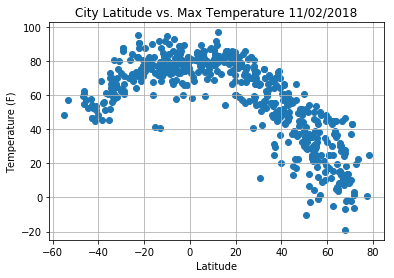

In [6]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

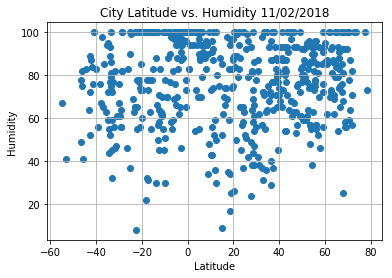

In [7]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/City Latitude vs. Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

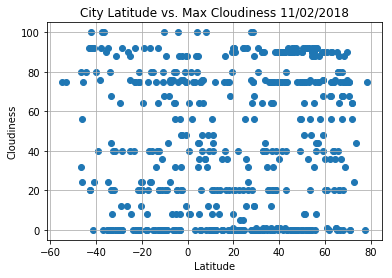

In [8]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

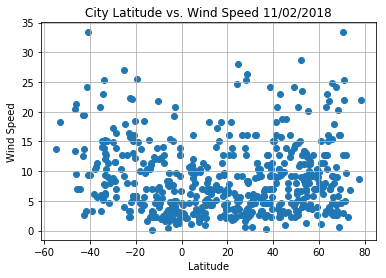

In [9]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Windspeed"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()